In [344]:
# bank marketting ML model
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [345]:
train_data=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv')


In [347]:
test_data=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv')

In [348]:
train_data.head()

ID  age         job   marital  education default  balance housing loan  \
0  26110   56      admin.   married    unknown      no     1933      no   no   
1  40576   31     unknown   married  secondary      no        3      no   no   
2  15320   27    services   married  secondary      no      891     yes   no   
3  43962   57  management  divorced   tertiary      no     3287      no   no   
4  29842   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4         no

In [349]:
test_data.head()

ID  age            job   marital  education default  balance housing  \
0  38441   32       services   married  secondary      no      118     yes   
1  40403   78        retired  divorced    primary      no     2787      no   
2   3709   31  self-employed    single   tertiary      no      144     yes   
3  37422   57       services    single    primary      no     3777     yes   
4  12527   45    blue-collar  divorced  secondary      no     -705      no   

  loan    contact  day month  duration  campaign  pdays  previous poutcome  
0   no   cellular   15   may        20         6     -1         0  unknown  
1   no  telephone    1   jul       372         1     -1         0  unknown  
2   no    unknown   16   may       676         1     -1         0  unknown  
3   no  telephone   13   may        65         2     -1         0  unknown  
4  yes    unknown    3   jul       111         1     -1         0  unknown

In [350]:
train_data.shape

(31647, 18)

In [351]:
test_data.shape

(13564, 17)

In [ ]:
# train dataset contains 31647 rows and 18 columns and test dataset contains 13564 rows and 17 columns

In [352]:
train_data.isna().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [353]:
test_data.isna().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [ ]:
# no nan present

In [354]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [355]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [356]:
# datase contains int ,object datatypes
train_data.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [357]:
test_data.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [358]:
train_data.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

ID  age         job   marital  education  default  balance  housing  \
0  26110   56      admin.   married    unknown        0     1933        0   
1  40576   31     unknown   married  secondary        0        3        0   
2  15320   27    services   married  secondary        0      891        1   
3  43962   57  management  divorced   tertiary        0     3287        0   
4  29842   31  technician   married  secondary        0      119        1   

   loan    contact  day month  duration  campaign pdays  previous poutcome  \
0     0  telephone   19   nov        44         2  None         0  unknown   
1     0   cellular   20   jul        91         2  None         0  unknown   
2     0   cellular   18   jul       240         1  None         0  unknown   
3     0   cellular   22   jun       867         1  None         3  success   
4     0   cellular    4   feb       380         1  None         0  unknown   

   subscribed  
0           0  
1           0  
2           0  
3           1  
4           0

In [361]:
train_data['default'].replace(['yes','no'],[1,0],inplace=True)
train_data['housing'].replace(['yes','no'],[1,0],inplace=True)
train_data['loan'].replace(['yes','no'],[1,0],inplace=True)
train_data['subscribed'].replace(['yes','no'],[1,0],inplace=True)

In [362]:
train_data.head()

ID  age         job   marital  education  default  balance  housing  \
0  26110   56      admin.   married    unknown        0     1933        0   
1  40576   31     unknown   married  secondary        0        3        0   
2  15320   27    services   married  secondary        0      891        1   
3  43962   57  management  divorced   tertiary        0     3287        0   
4  29842   31  technician   married  secondary        0      119        1   

   loan    contact  day month  duration  campaign  pdays  previous poutcome  \
0     0  telephone   19   nov        44         2     -1         0  unknown   
1     0   cellular   20   jul        91         2     -1         0  unknown   
2     0   cellular   18   jul       240         1     -1         0  unknown   
3     0   cellular   22   jun       867         1     84         3  success   
4     0   cellular    4   feb       380         1     -1         0  unknown   

   subscribed  
0           0  
1           0  
2           0  
3           1  
4           0

In [363]:
test_data['default'].replace(['yes','no'],[1,0],inplace=True)
test_data['housing'].replace(['yes','no'],[1,0],inplace=True)
test_data['loan'].replace(['yes','no'],[1,0],inplace=True)


In [365]:
test_data.head()

ID  age            job   marital  education  default  balance  housing  \
0  38441   32       services   married  secondary        0      118        1   
1  40403   78        retired  divorced    primary        0     2787        0   
2   3709   31  self-employed    single   tertiary        0      144        1   
3  37422   57       services    single    primary        0     3777        1   
4  12527   45    blue-collar  divorced  secondary        0     -705        0   

   loan    contact  day month  duration  campaign  pdays  previous poutcome  
0     0   cellular   15   may        20         6     -1         0  unknown  
1     0  telephone    1   jul       372         1     -1         0  unknown  
2     0    unknown   16   may       676         1     -1         0  unknown  
3     0  telephone   13   may        65         2     -1         0  unknown  
4     1    unknown    3   jul       111         1     -1         0  unknown

In [366]:
# check value counts in each columns
for i in train_data.columns:
    print(train_data[i].value_counts())
    print('\n')

26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64


32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64


blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


0    31062
1      585
Name: default, dtype: int64


 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722      

In [367]:
# check value counts in each columns
for i in test_data.columns:
    print(test_data[i].value_counts())
    print('\n')

38441    1
23664    1
23378    1
18945    1
32574    1
        ..
4606     1
23686    1
35672    1
8550     1
34839    1
Name: ID, Length: 13564, dtype: int64


32    628
34    609
35    580
31    579
33    566
     ... 
95      1
86      1
92      1
89      1
90      1
Name: age, Length: 75, dtype: int64


blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
Name: job, dtype: int64


married     8119
single      3868
divorced    1577
Name: marital, dtype: int64


secondary    6978
tertiary     4000
primary      2043
unknown       543
Name: education, dtype: int64


0    13334
1      230
Name: default, dtype: int64


 0       1044
 1         58
 2         47
 3         46
 4         44
         ... 
-140        1
 6495       1
 8180       1
 3684       1
 4256       1
Name: bala

In [368]:
train_data['previous'].nunique()

38

In [369]:
test_data['previous'].nunique()

33

In [370]:
train_data['pdays'].nunique()

509

In [213]:
test_data['pdays'].nunique()

422

In [122]:
train_data['duration'].nunique()

1454

In [214]:
test_data['duration'].nunique()

1201

In [371]:
train_data['duration'].value_counts()

90      135
124     130
139     127
88      127
104     127
       ... 
1405      1
1090      1
1261      1
1218      1
1973      1
Name: duration, Length: 1454, dtype: int64

In [372]:
train_data['duration'].value_counts()

90      135
124     130
139     127
88      127
104     127
       ... 
1405      1
1090      1
1261      1
1218      1
1973      1
Name: duration, Length: 1454, dtype: int64

In [373]:
train_data=train_data[train_data['duration']>0]

In [374]:
test_data.describe()

ID           age       default       balance       housing  \
count  13564.000000  13564.000000  13564.000000  13564.000000  13564.000000   
mean   22704.057726     40.887128      0.016957   1358.496535      0.556326   
std    12994.043329     10.604108      0.129114   3082.940623      0.496836   
min        1.000000     18.000000      0.000000  -3313.000000      0.000000   
25%    11546.000000     33.000000      0.000000     71.000000      0.000000   
50%    22782.000000     39.000000      0.000000    445.000000      1.000000   
75%    33974.250000     48.000000      0.000000   1413.250000      1.000000   
max    45206.000000     95.000000      1.000000  98417.000000      1.000000   

              loan           day      duration      campaign         pdays  \
count  13564.00000  13564.000000  13564.000000  13564.000000  13564.000000   
mean       0.15578     15.738646    258.278679      2.759510     41.648555   
std        0.36266      8.288174    258.488648      3.060928    101.985178   
min        0.00000      1.000000      0.000000      1.000000     -1.000000   
25%        0.00000      8.000000    102.000000      1.000000     -1.000000   
50%        0.00000     16.000000    180.000000      2.000000     -1.000000   
75%        0.00000     21.000000    319.000000      3.000000     -1.000000   
max        1.00000     31.000000   3253.000000     58.000000    850.000000   

           previous  
count  13564.000000  
mean       0.594441  
std        1.998193  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       55.000000

In [375]:
test_data[test_data['duration']==0]

ID  age           job  marital  education  default  balance  housing  \
346   36426   31  entrepreneur  married  secondary        0      162        1   
5000  22938   35    technician  married  secondary        0     5535        0   

      loan   contact  day month  duration  campaign  pdays  previous poutcome  
346      1  cellular   11   may         0         2     -1         0  unknown  
5000     0  cellular   26   aug         0        15     -1         0  unknown

In [376]:
test_data=test_data[test_data['duration']>0]

In [377]:
train_data.shape

(31646, 18)

In [378]:
test_data.shape

(13562, 17)

<bound method DataFrame.drop of         ID  age         job  marital education  default  balance  housing  \
8959  6425   53  management  married   primary        0      351        1   

      loan  contact  day month  duration  campaign  pdays  previous poutcome  \
8959     0  unknown   27   may         0         4     -1         0  unknown   

      subscribed  
8959           0  >

In [379]:
train_data.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default        int64
balance        int64
housing        int64
loan           int64
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed     int64
dtype: object

In [225]:
test_data.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default       int64
balance       int64
housing       int64
loan          int64
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [380]:
# Checking categorical columns and contineous column
categorical_col=[]
for i in train_data.dtypes.index:
    if train_data.dtypes[i]=='object':
        categorical_col.append(i)
print('categorical columns :',categorical_col)
print('\n')
# contineous columns
contineous_col=[]
for i in train_data.dtypes.index:
    if train_data.dtypes[i]!='object':
        contineous_col.append(i)
print('Contineous column :',contineous_col)
print('\n')
        


categorical columns : ['job', 'marital', 'education', 'contact', 'month', 'poutcome']


Contineous column : ['ID', 'age', 'default', 'balance', 'housing', 'loan', 'day', 'duration', 'campaign', 'pdays', 'previous', 'subscribed']




In [381]:
# Checking categorical columns and contineous column
categorical_col1=[]
for i in test_data.dtypes.index:
    if test_data.dtypes[i]=='object':
        categorical_col1.append(i)
print('categorical columns :',categorical_col1)
print('\n')
# contineous columns
contineous_col1=[]
for i in test_data.dtypes.index:
    if test_data.dtypes[i]!='object':
        contineous_col1.append(i)
print('Contineous column :',contineous_col1)
print('\n')

categorical columns : ['job', 'marital', 'education', 'contact', 'month', 'poutcome']


Contineous column : ['ID', 'age', 'default', 'balance', 'housing', 'loan', 'day', 'duration', 'campaign', 'pdays', 'previous']




In [382]:
train_data['job'].unique()

array(['admin.', 'unknown', 'services', 'management', 'technician',
       'retired', 'blue-collar', 'housemaid', 'self-employed', 'student',
       'entrepreneur', 'unemployed'], dtype=object)

In [383]:
test_data['job'].unique()

array(['services', 'retired', 'self-employed', 'blue-collar',
       'management', 'technician', 'admin.', 'unemployed', 'housemaid',
       'entrepreneur', 'student', 'unknown'], dtype=object)

In [384]:
train_data['marital'].unique()

array(['married', 'divorced', 'single'], dtype=object)

In [385]:
test_data['marital'].unique()

array(['married', 'divorced', 'single'], dtype=object)

In [386]:
train_data['education'].unique()

array(['unknown', 'secondary', 'tertiary', 'primary'], dtype=object)

In [387]:
test_data['education'].unique()

array(['secondary', 'primary', 'tertiary', 'unknown'], dtype=object)

In [388]:
train_data['contact'].unique()

array(['telephone', 'cellular', 'unknown'], dtype=object)

In [389]:
test_data['contact'].unique()

array(['cellular', 'telephone', 'unknown'], dtype=object)

In [390]:
train_data['month'].unique()

array(['nov', 'jul', 'jun', 'feb', 'sep', 'jan', 'may', 'aug', 'apr',
       'oct', 'mar', 'dec'], dtype=object)

In [391]:
test_data['month'].unique()

array(['may', 'jul', 'jun', 'mar', 'feb', 'sep', 'aug', 'dec', 'jan',
       'apr', 'nov', 'oct'], dtype=object)

In [392]:
train_data['poutcome'].unique()

array(['unknown', 'success', 'failure', 'other'], dtype=object)

In [393]:
test_data['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [394]:
train_data.isna().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [395]:
test_data.isna().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [396]:
train_data.describe()

ID           age       default        balance       housing  \
count  31646.000000  31646.000000  31646.000000   31646.000000  31646.000000   
mean   22564.482146     40.956867      0.018486    1363.922265      0.555615   
std    13075.828849     10.625087      0.134702    3028.346788      0.496905   
min        2.000000     18.000000      0.000000   -8019.000000      0.000000   
25%    11219.250000     33.000000      0.000000      73.000000      0.000000   
50%    22519.500000     39.000000      0.000000     450.000000      1.000000   
75%    33879.750000     48.000000      0.000000    1431.000000      1.000000   
max    45211.000000     95.000000      1.000000  102127.000000      1.000000   

               loan           day      duration      campaign         pdays  \
count  31646.000000  31646.000000  31646.000000  31646.000000  31646.000000   
mean       0.162137     15.835113    258.121690      2.765658     39.577324   
std        0.368583      8.336992    257.118941      3.113872     99.318900   
min        0.000000      1.000000      2.000000      1.000000     -1.000000   
25%        0.000000      8.000000    104.000000      1.000000     -1.000000   
50%        0.000000     16.000000    180.000000      2.000000     -1.000000   
75%        0.000000     21.000000    318.750000      3.000000     -1.000000   
max        1.000000     31.000000   4918.000000     63.000000    871.000000   

           previous    subscribed  
count  31646.000000  31646.000000  
mean       0.574291      0.117392  
std        2.422565      0.321892  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max      275.000000      1.000000

In [397]:
test_data.describe()

ID           age       default       balance       housing  \
count  13562.000000  13562.000000  13562.000000  13562.000000  13562.000000   
mean   22703.028683     40.888291      0.016959   1358.276803      0.556334   
std    12994.467043     10.604430      0.129123   3082.942221      0.496835   
min        1.000000     18.000000      0.000000  -3313.000000      0.000000   
25%    11544.000000     33.000000      0.000000     71.000000      0.000000   
50%    22777.000000     39.000000      0.000000    445.000000      1.000000   
75%    33973.500000     48.000000      0.000000   1412.750000      1.000000   
max    45206.000000     95.000000      1.000000  98417.000000      1.000000   

               loan           day      duration      campaign         pdays  \
count  13562.000000  13562.000000  13562.000000  13562.000000  13562.000000   
mean       0.155729     15.738239    258.316767      2.758664     41.654844   
std        0.362612      8.288217    258.488676      3.059341    101.991383   
min        0.000000      1.000000      1.000000      1.000000     -1.000000   
25%        0.000000      8.000000    102.000000      1.000000     -1.000000   
50%        0.000000     16.000000    180.000000      2.000000     -1.000000   
75%        0.000000     21.000000    319.000000      3.000000     -1.000000   
max        1.000000     31.000000   3253.000000     58.000000    850.000000   

           previous  
count  13562.000000  
mean       0.594529  
std        1.998327  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       55.000000

In [398]:
train_data=train_data[train_data['balance']>=0]

In [399]:
test_data=test_data[test_data['balance']>=0]

In [400]:
train_data.describe()

ID           age       default        balance       housing  \
count  28981.000000  28981.000000  28981.000000   28981.000000  28981.000000   
mean   22968.366378     41.082364      0.009178    1518.609330      0.540458   
std    13086.241329     10.749652      0.095365    3117.149229      0.498369   
min        2.000000     18.000000      0.000000       0.000000      0.000000   
25%    11588.000000     33.000000      0.000000     148.000000      0.000000   
50%    23141.000000     39.000000      0.000000     544.000000      1.000000   
75%    34174.000000     49.000000      0.000000    1599.000000      1.000000   
max    45211.000000     95.000000      1.000000  102127.000000      1.000000   

               loan           day      duration      campaign         pdays  \
count  28981.000000  28981.000000  28981.000000  28981.000000  28981.000000   
mean       0.147476     15.780063    258.831510      2.749353     40.017046   
std        0.354586      8.311865    258.598331      3.076051     99.319214   
min        0.000000      1.000000      2.000000      1.000000     -1.000000   
25%        0.000000      8.000000    103.000000      1.000000     -1.000000   
50%        0.000000     16.000000    181.000000      2.000000     -1.000000   
75%        0.000000     21.000000    320.000000      3.000000     -1.000000   
max        1.000000     31.000000   4918.000000     63.000000    871.000000   

           previous    subscribed  
count  28981.000000  28981.000000  
mean       0.589524      0.123495  
std        2.480100      0.329010  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max      275.000000      1.000000

In [401]:
test_data.describe()

ID           age       default       balance       housing  \
count  12461.000000  12461.000000  12461.000000  12461.000000  12461.000000   
mean   23104.606773     41.036594      0.008747   1506.234732      0.539844   
std    12987.541314     10.714361      0.093121   3172.521087      0.498430   
min        1.000000     18.000000      0.000000      0.000000      0.000000   
25%    11925.000000     33.000000      0.000000    142.000000      0.000000   
50%    23388.000000     39.000000      0.000000    536.000000      1.000000   
75%    34197.000000     48.000000      0.000000   1578.000000      1.000000   
max    45206.000000     95.000000      1.000000  98417.000000      1.000000   

               loan           day      duration      campaign         pdays  \
count  12461.000000  12461.000000  12461.000000  12461.000000  12461.000000   
mean       0.141160     15.674986    258.504133      2.747292     42.104165   
std        0.348201      8.260339    257.188461      3.024793    101.997785   
min        0.000000      1.000000      1.000000      1.000000     -1.000000   
25%        0.000000      8.000000    102.000000      1.000000     -1.000000   
50%        0.000000     16.000000    180.000000      2.000000     -1.000000   
75%        0.000000     21.000000    321.000000      3.000000     -1.000000   
max        1.000000     31.000000   3094.000000     58.000000    850.000000   

           previous  
count  12461.000000  
mean       0.611508  
std        2.037811  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       55.000000

In [402]:
train_data.shape

(28981, 18)

In [403]:
test_data.shape

(12461, 17)

In [404]:
train_data['subscribed'].value_counts()

0    25402
1     3579
Name: subscribed, dtype: int64

In [405]:
train_data['pdays']=train_data['pdays'].replace(-1,0)

In [406]:
test_data['pdays']=test_data['pdays'].replace(-1,0)

In [407]:
train_data.tail()

ID  age         job   marital  education  default  balance  housing  \
31642  36483   29  management    single   tertiary        0        0        1   
31643  40178   53  management  divorced   tertiary        0      380        0   
31644  19710   32  management    single   tertiary        0      312        0   
31645  38556   57  technician   married  secondary        0      225        1   
31646  14156   55  management  divorced  secondary        0      204        1   

       loan    contact  day month  duration  campaign  pdays  previous  \
31642     0   cellular   12   may       116         2      0         0   
31643     1   cellular    5   jun       438         2      0         0   
31644     0   cellular    7   aug        37         3      0         0   
31645     0  telephone   15   may        22         7    337        12   
31646     0   cellular   11   jul      1973         2      0         0   

      poutcome  subscribed  
31642  unknown           0  
31643  unknown           1  
31644  unknown           0  
31645  failure           0  
31646  unknown           1

In [408]:
test_data.tail()

ID  age          job  marital  education  default  balance  housing  \
13559  23465   39   management  married   tertiary        0       45        0   
13560  11743   54  blue-collar  married    primary        0     2281        1   
13561  28292   35      retired  married    primary        0      285        1   
13562  45163   29       admin.   single  secondary        0      464        0   
13563  34839   29       admin.  married  secondary        0        2        1   

       loan   contact  day month  duration  campaign  pdays  previous poutcome  
13559     0  cellular   28   aug       148         4      0         0  unknown  
13560     0   unknown   20   jun       158         1      0         0  unknown  
13561     0  cellular   29   jan       136         1      0         0  unknown  
13562     0  cellular    9   nov       208         2     91         3  success  
13563     0  cellular    6   may       339         1    362         1  failure

0    25402
1     3579
Name: subscribed, dtype: int64


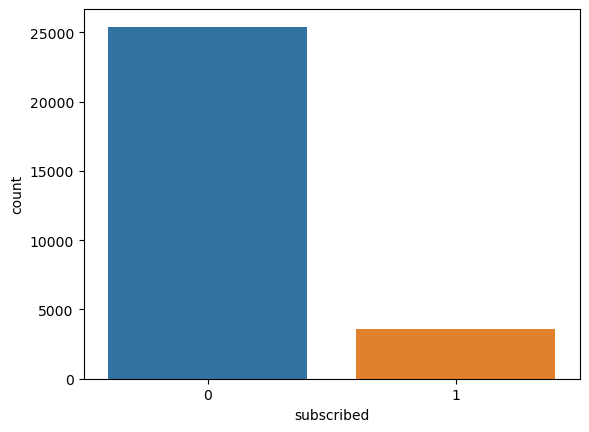

In [409]:
# lets visualise target count
sns.countplot(x='subscribed',data=train_data)
print(train_data['subscribed'].value_counts())
plt.show()

married     17510
single       8237
divorced     3234
Name: marital, dtype: int64


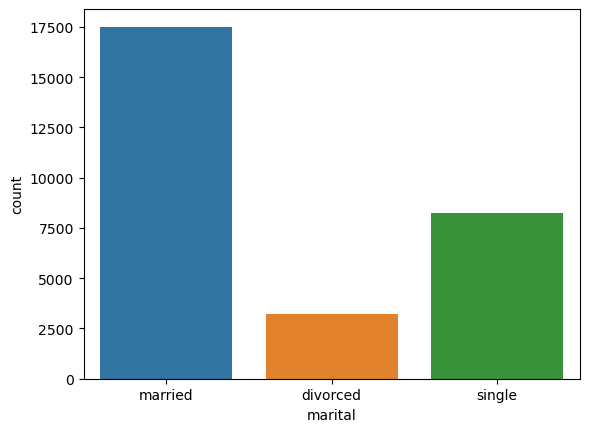

In [255]:
# lets visualise taret with marital status
sns.countplot(x='marital',data=train_data)
print(train_data['marital'].value_counts())
plt.show()

married     7499
single      3565
divorced    1397
Name: marital, dtype: int64


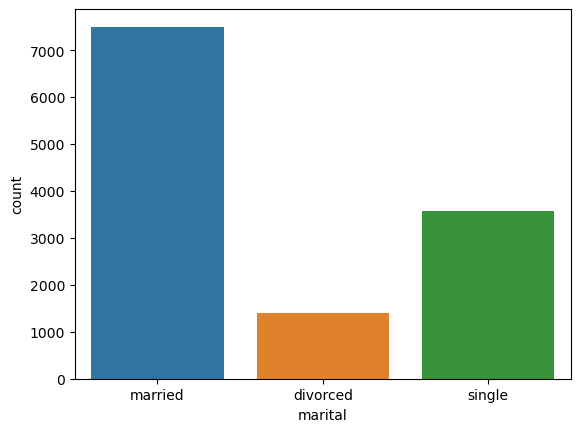

In [410]:
# lets visualise taret with marital status for test data
sns.countplot(x='marital',data=test_data)
print(test_data['marital'].value_counts())
plt.show()

0    24707
1     4274
Name: loan, dtype: int64


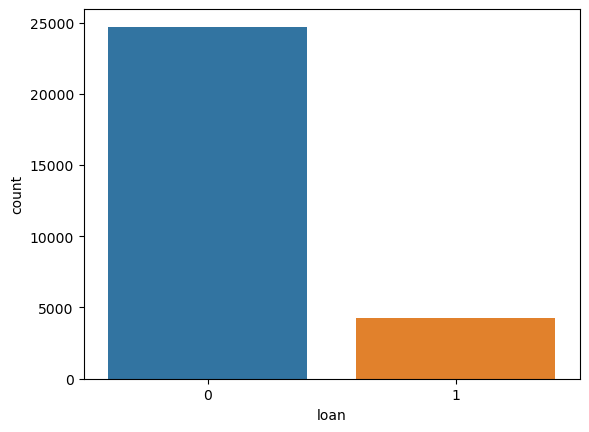

In [411]:
# lets visualise  loan count for traindata
sns.countplot(x='loan',data=train_data)
print(train_data['loan'].value_counts())
plt.show()

0    10702
1     1759
Name: loan, dtype: int64


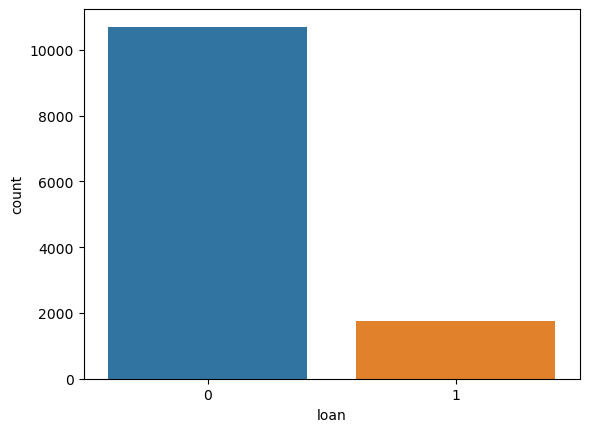

In [258]:
# lets visualise  loan count for test data
sns.countplot(x='loan',data=test_data)
print(test_data['loan'].value_counts())
plt.show()

0    28715
1      266
Name: default, dtype: int64


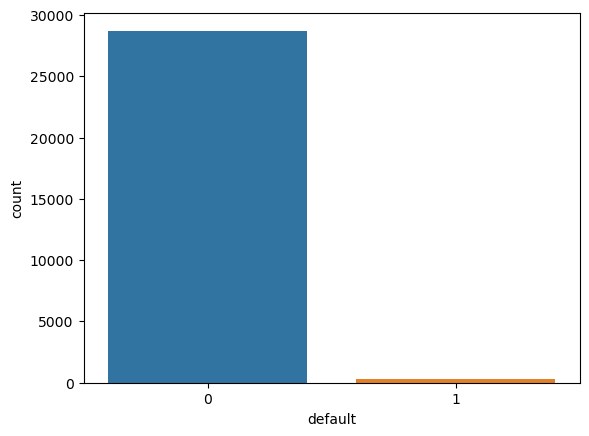

In [259]:
# lets visualise default count for train data
sns.countplot(x='default',data=train_data)
print(train_data['default'].value_counts())
plt.show()

0    12352
1      109
Name: default, dtype: int64


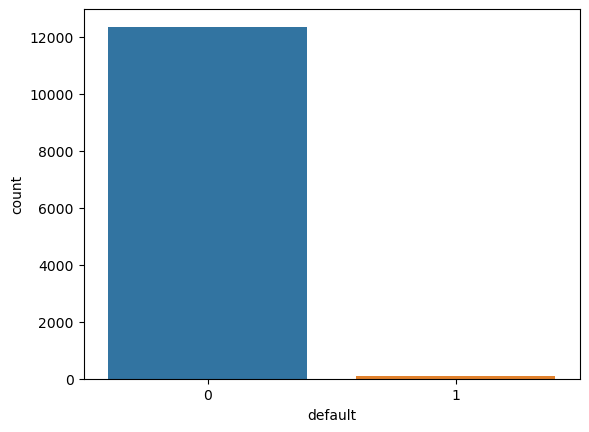

In [260]:
# lets visualise default count for test data
sns.countplot(x='default',data=test_data)
print(test_data['default'].value_counts())
plt.show()

secondary    14579
tertiary      8801
primary       4376
unknown       1225
Name: education, dtype: int64


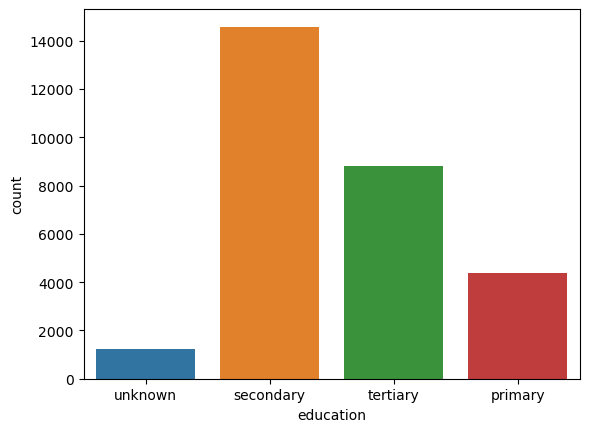

In [147]:
# lets visualise education count for train data
sns.countplot(x='education',data=train_data)
print(train_data['education'].value_counts())
plt.show()

secondary    6310
tertiary     3780
primary      1867
unknown       504
Name: education, dtype: int64


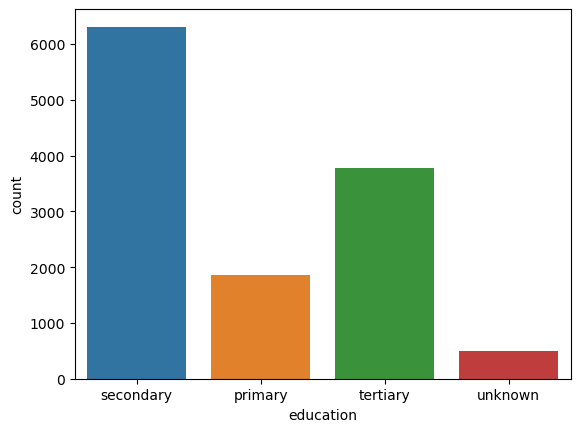

In [261]:
# lets visualise education count for test data
sns.countplot(x='education',data=test_data)
print(test_data['education'].value_counts())
plt.show()

cellular     18889
unknown       8127
telephone     1965
Name: contact, dtype: int64


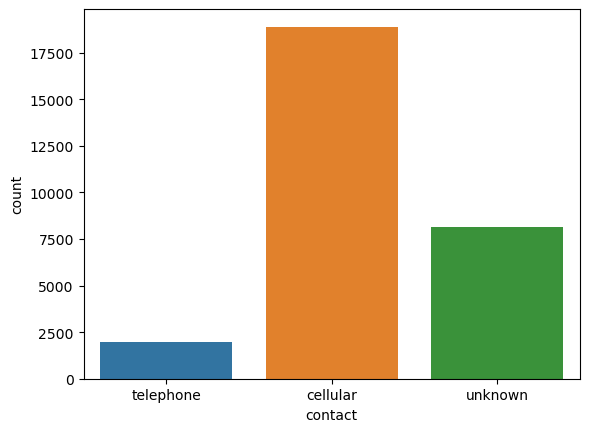

In [262]:
# lets visualise contact count for train data
sns.countplot(x='contact',data=train_data)
print(train_data['contact'].value_counts())
plt.show()

cellular     8231
unknown      3412
telephone     818
Name: contact, dtype: int64


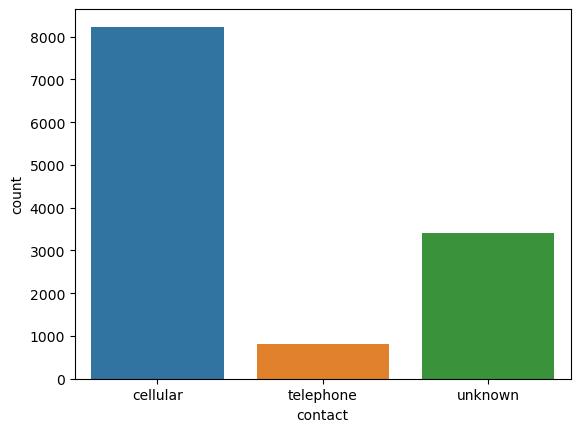

In [263]:
# lets visualise contact count for test data
sns.countplot(x='contact',data=test_data)
print(test_data['contact'].value_counts())
plt.show()

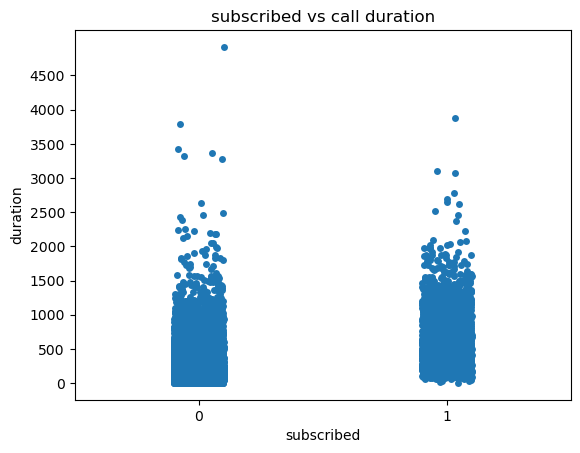

In [264]:
# lets visualise subscribed and call duration
sns.stripplot(x='subscribed',y='duration',data=train_data)
plt.title('subscribed vs call duration')
plt.yticks(range(0,5000,500))
plt.show()

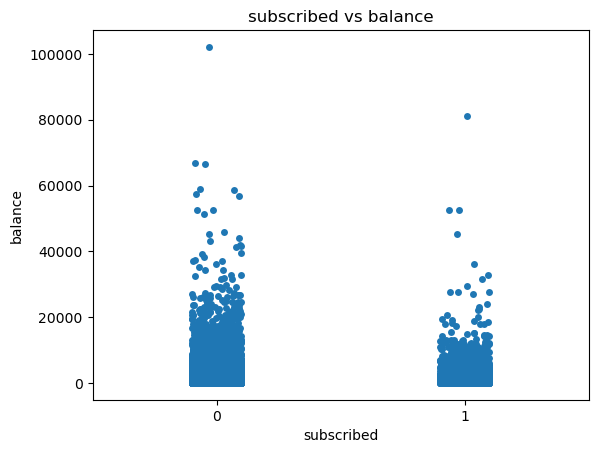

In [265]:
# lets visualise subscribed vs deposit
sns.stripplot(x='subscribed',y='balance',data=train_data)
plt.title('subscribed vs balance')
plt.show()

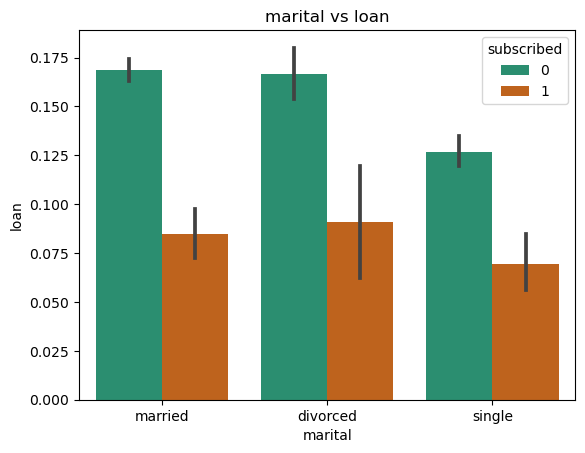

In [266]:
# lets visualise marital status and loan on subscribed for train data
sns.barplot(x='marital',y='loan',hue='subscribed',data=train_data,palette='Dark2')
plt.title('marital vs loan')
plt.show()


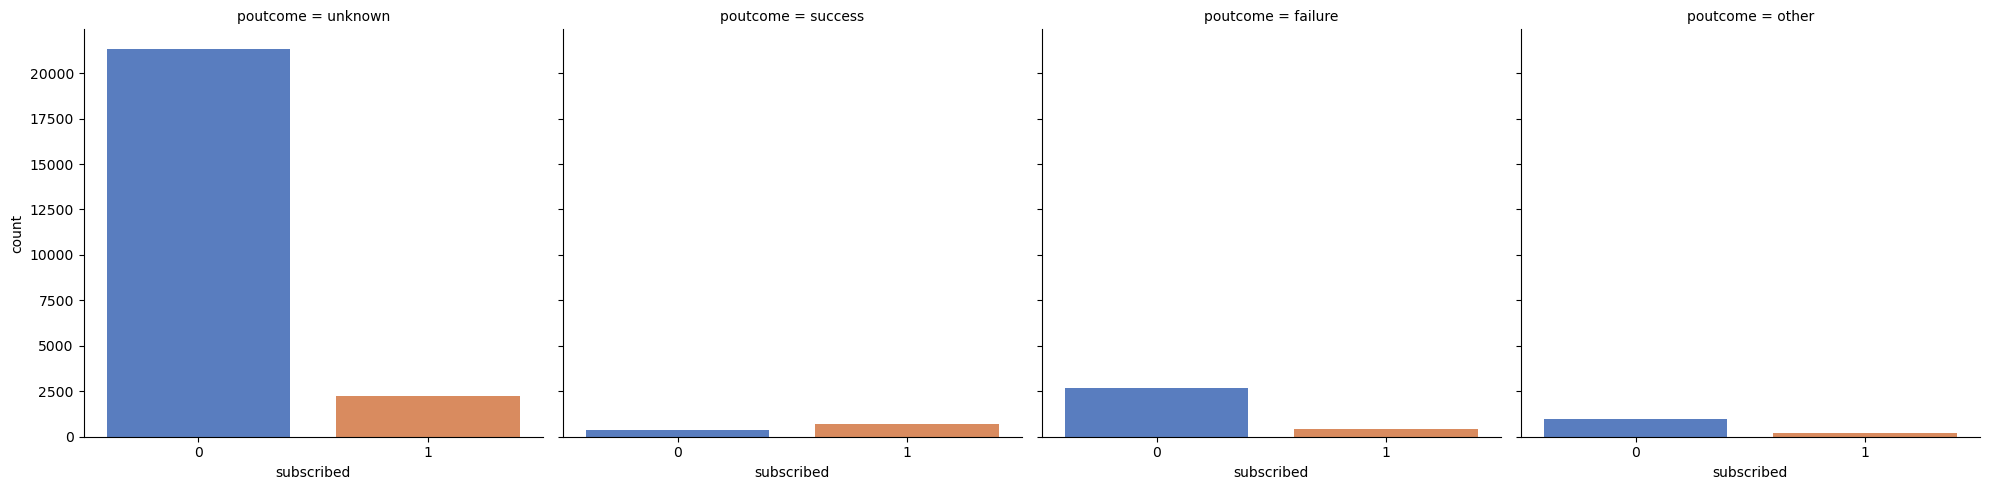

In [267]:
# lets subscribed status with poutcome
sns.catplot(x='subscribed',col='poutcome',data=train_data,kind='count',palette='muted')

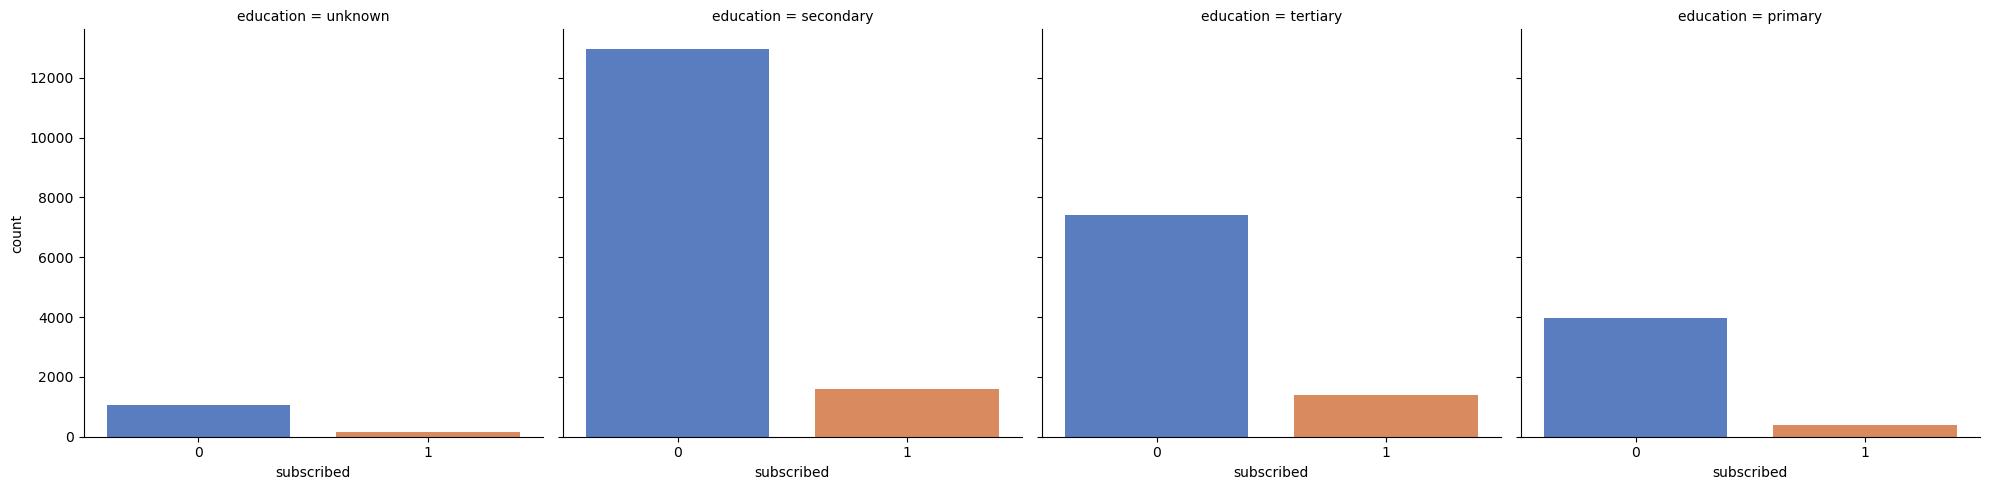

In [159]:
sns.catplot(x='subscribed',col='education',data=train_data,kind='count',palette='muted')

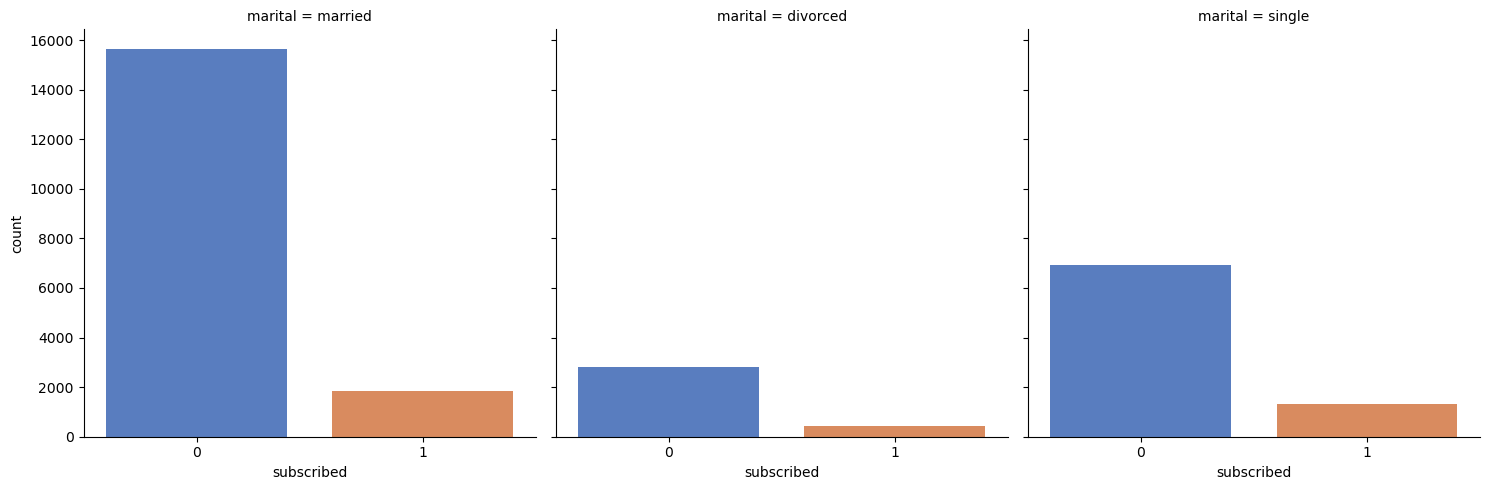

In [268]:
sns.catplot(x='subscribed',col='marital',data=train_data,kind='count',palette='muted')

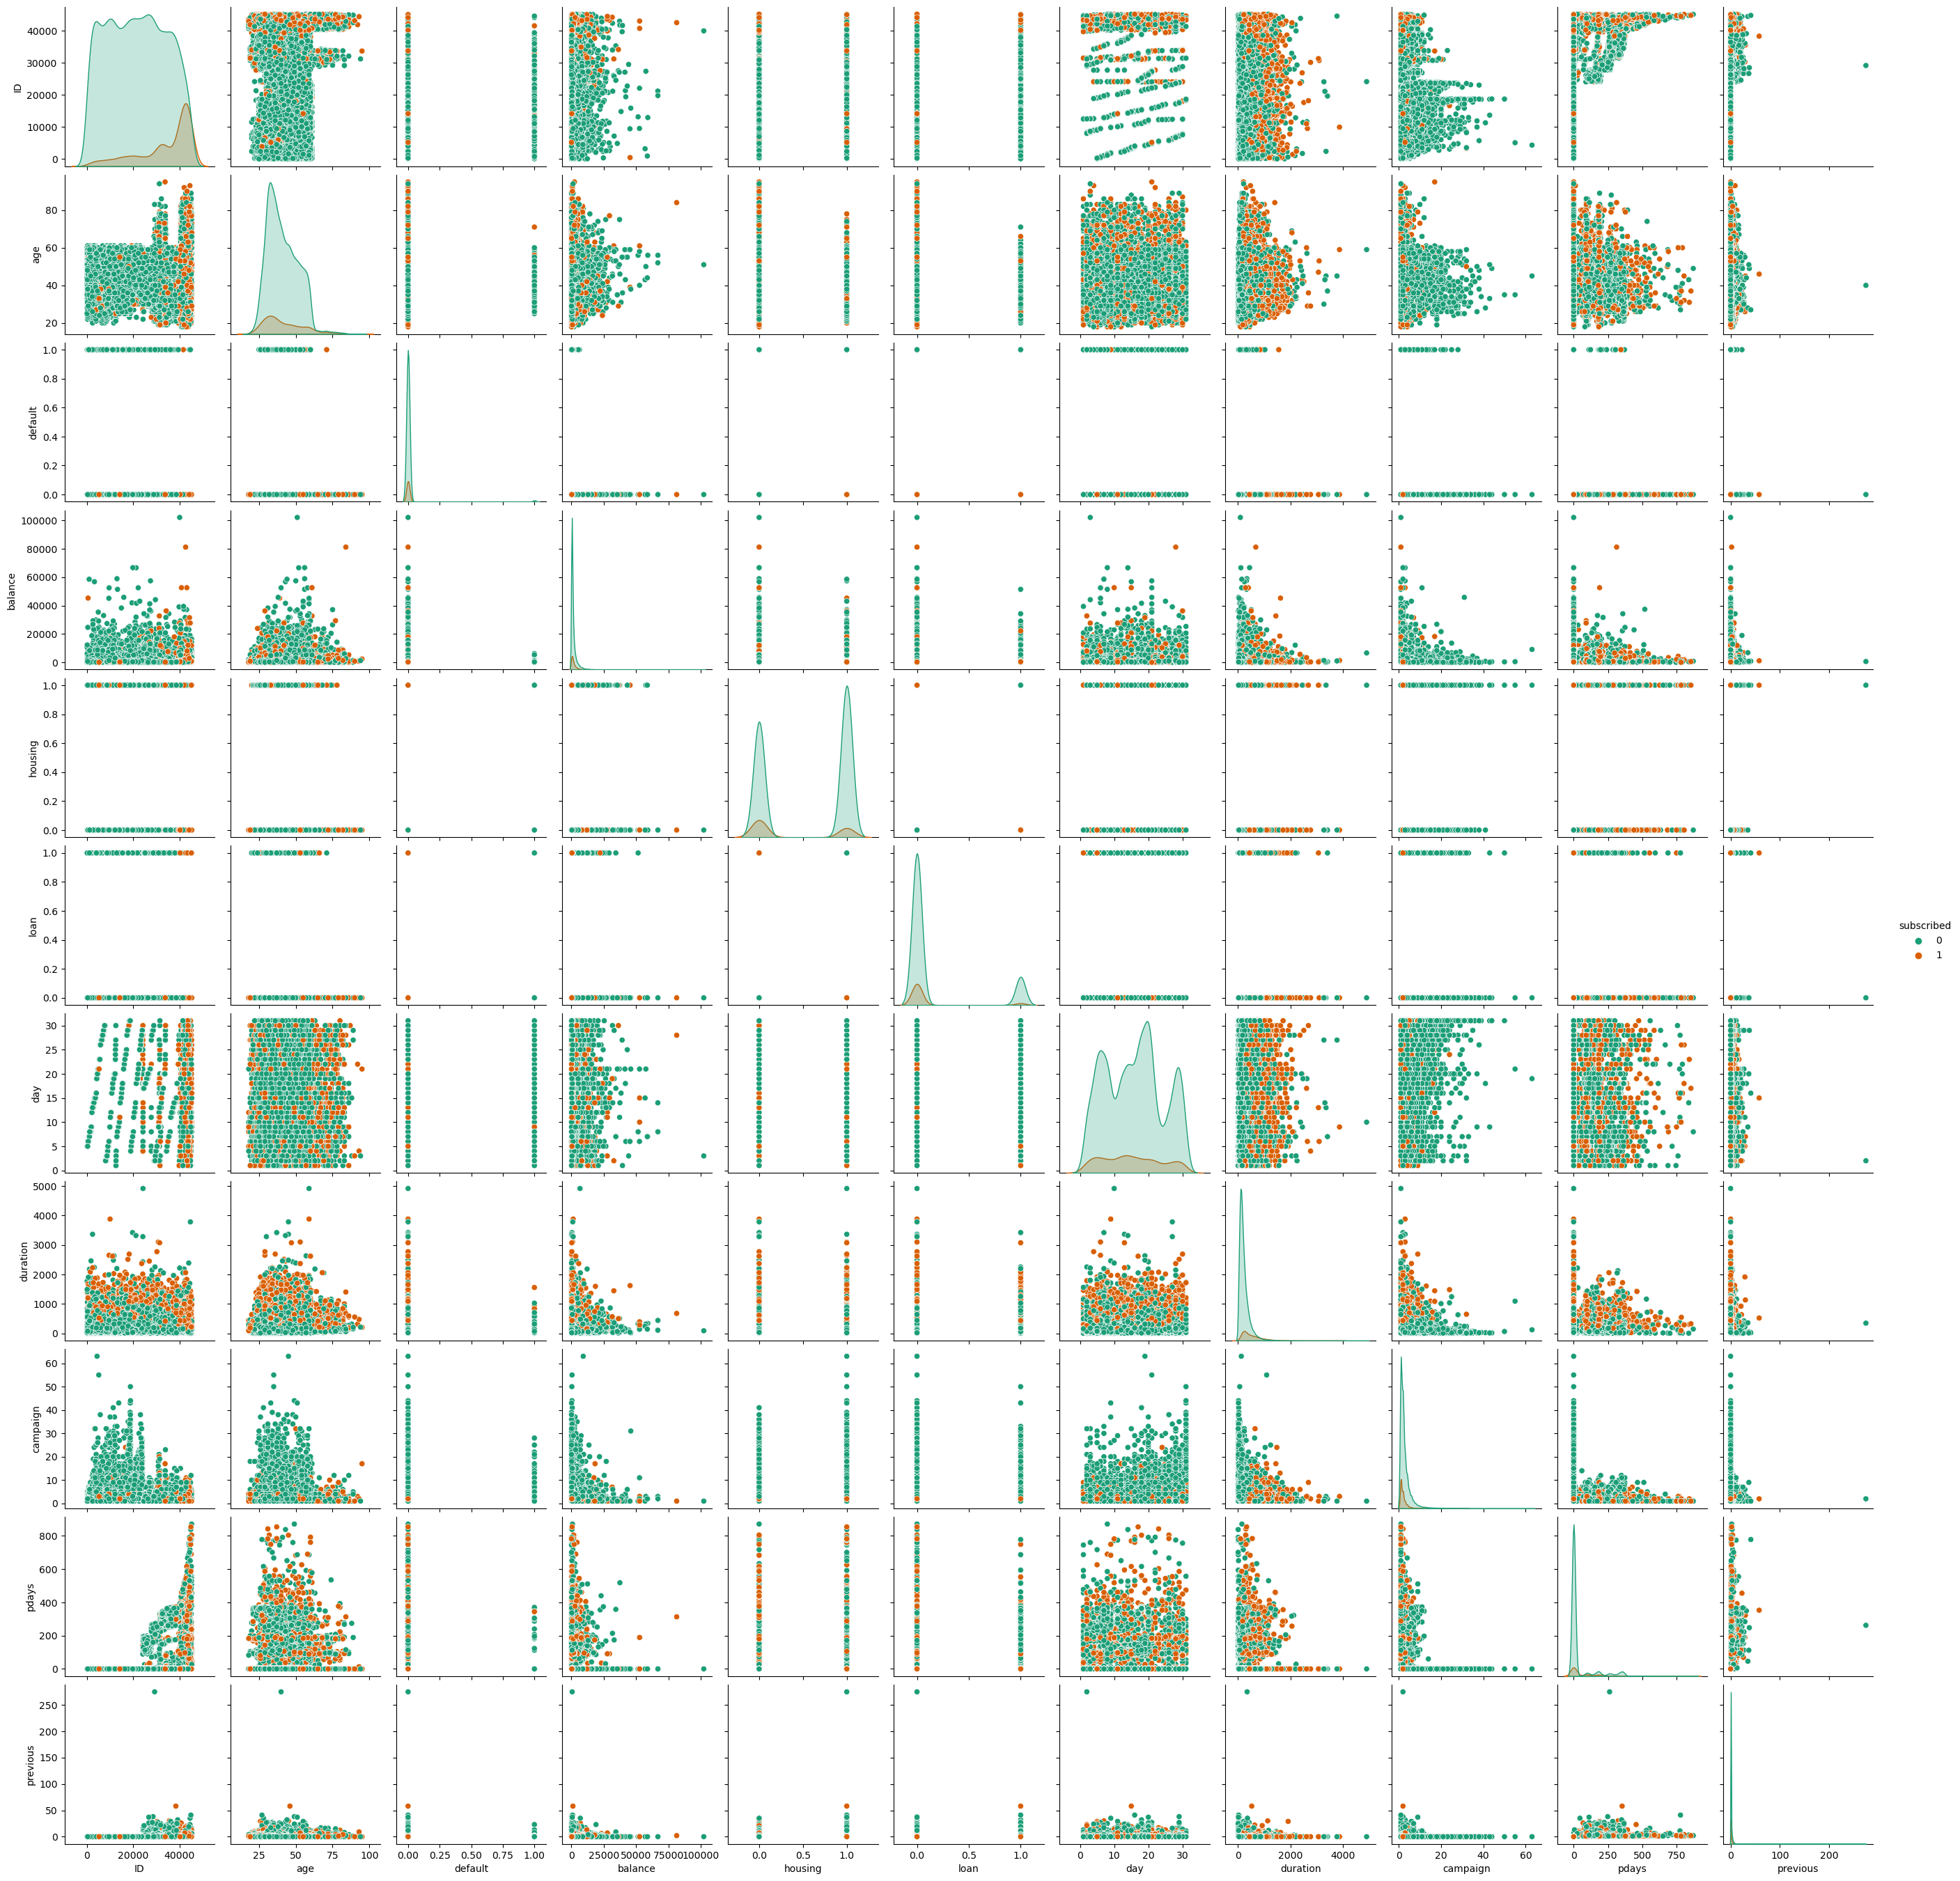

In [269]:
sns.pairplot(train_data,hue='subscribed',palette='Dark2')
plt.show()

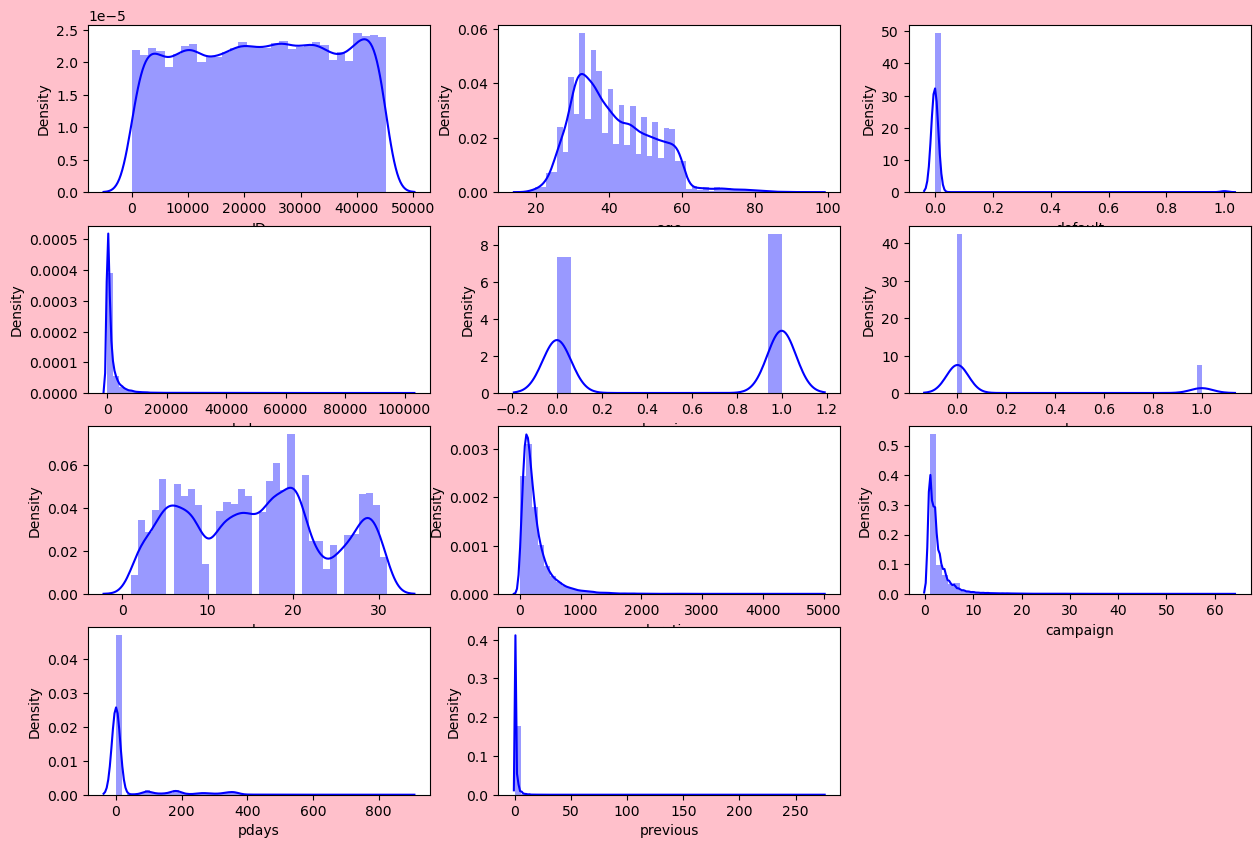

In [412]:
# lets check distribution of data for train data
plt.figure(figsize=(15,10),facecolor='pink')
p=1
for column in contineous_col:
    if p<12:
        plt.subplot(4,3,p)
        sns.distplot(train_data[column],color='b')
        plt.xlabel(column,fontsize=10)
    p+=1
plt.show()

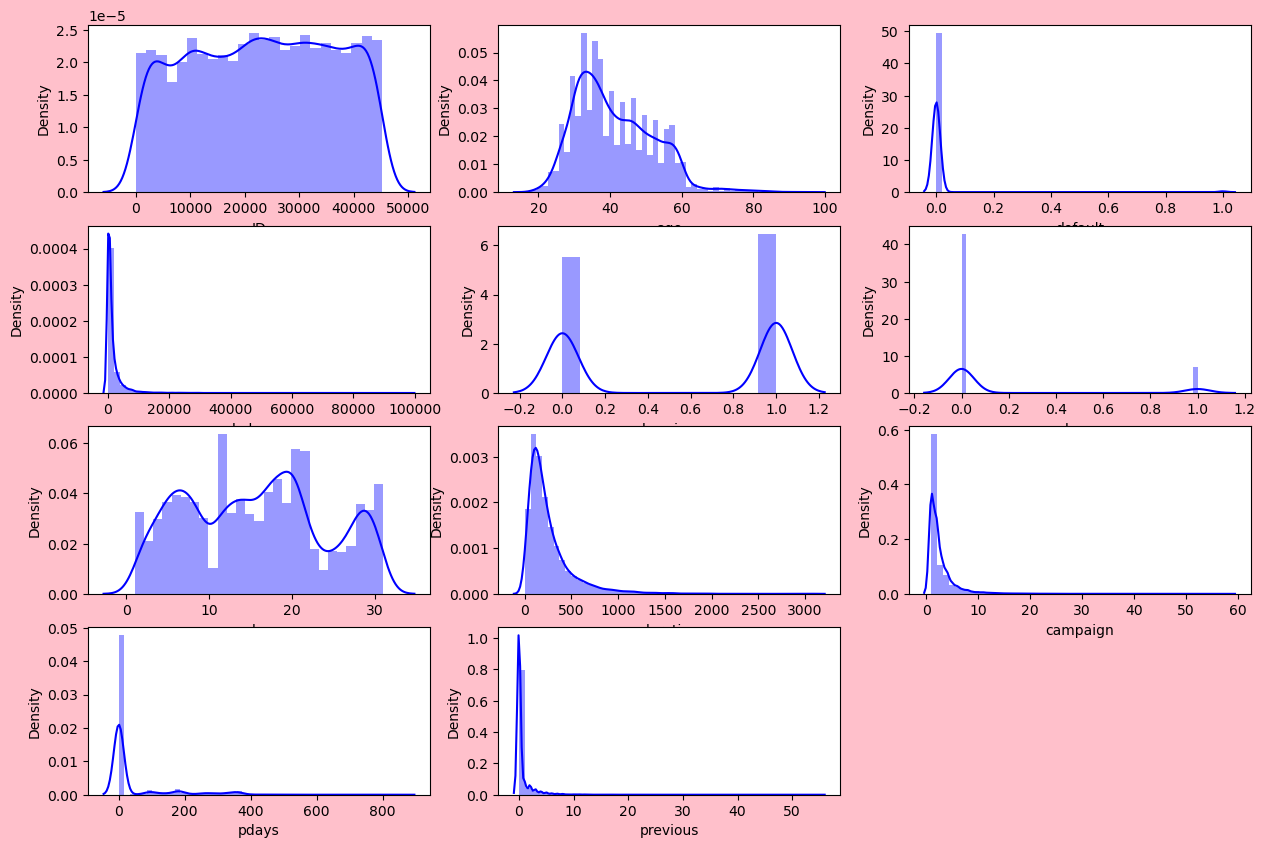

In [272]:
# lets check distribution of data for test data
plt.figure(figsize=(15,10),facecolor='pink')
p=1
for column in contineous_col1:
    if p<12:
        plt.subplot(4,3,p)
        sns.distplot(test_data[column],color='b')
        plt.xlabel(column,fontsize=10)
    p+=1
plt.show()

In [163]:
contineous_col

['ID',
 'age',
 'default',
 'balance',
 'housing',
 'loan',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'subscribed']

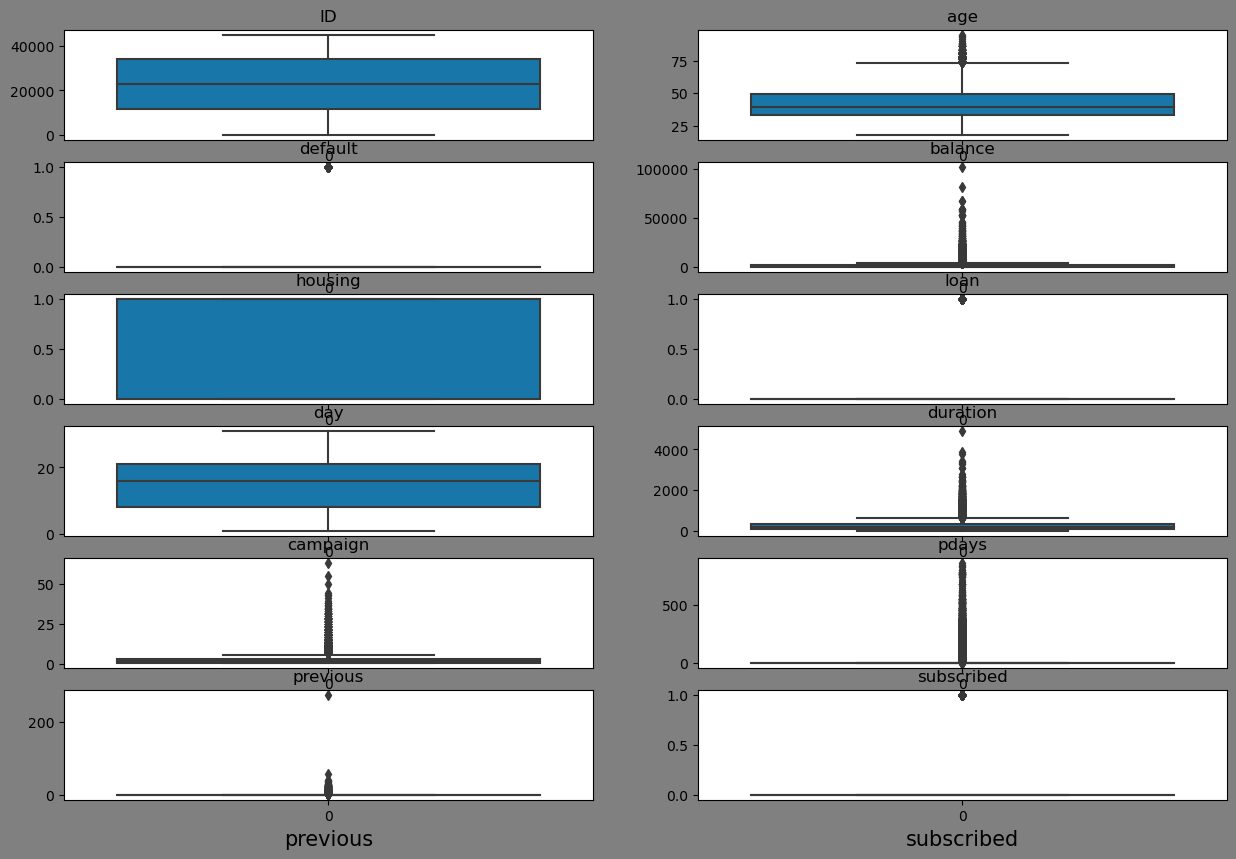

In [413]:
plt.figure(figsize=(15,10),facecolor='grey')
p=1
for column in contineous_col:
    if p<13:
        plt.subplot(6,2,p)
        sns.boxplot(train_data[column],palette='winter_r')
        plt.xlabel(column,fontsize=15)
        plt.title(column)
    p+=1
plt.show()

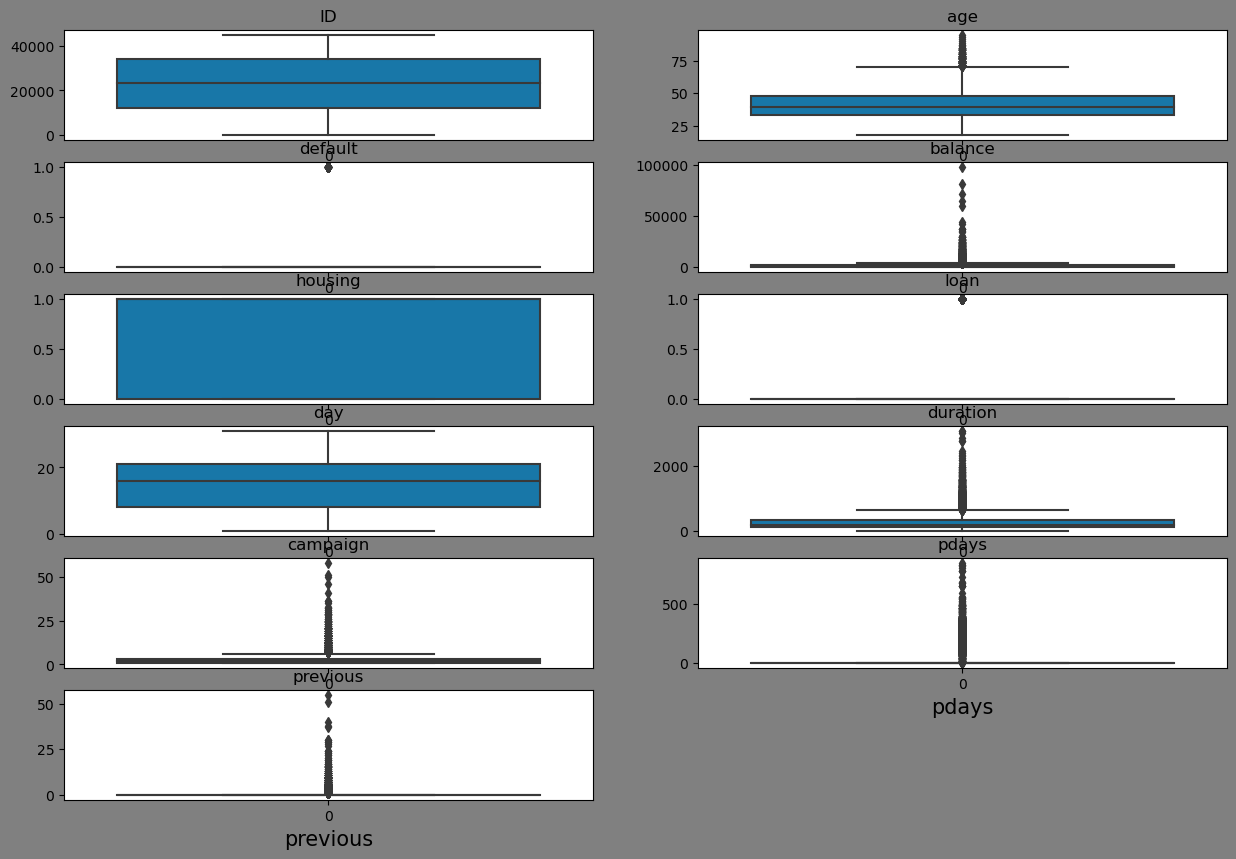

In [274]:
plt.figure(figsize=(15,10),facecolor='grey')
p=1
for column in contineous_col1:
    if p<13:
        plt.subplot(6,2,p)
        sns.boxplot(test_data[column],palette='winter_r')
        plt.xlabel(column,fontsize=15)
        plt.title(column)
    p+=1
plt.show()

In [414]:
train_data.skew()

ID            -0.030581
age            0.689644
default       10.294239
balance        7.874613
housing       -0.162371
loan           1.988508
day            0.091757
duration       3.220820
campaign       4.903960
pdays          2.654281
previous      49.958661
subscribed     2.288875
dtype: float64

In [415]:
test_data.skew()

ID          -0.051687
age          0.698243
default     10.552570
balance      9.029825
housing     -0.159905
loan         2.061437
day          0.111297
duration     2.954717
campaign     4.993890
pdays        2.560549
previous     8.718081
dtype: float64

In [416]:
from sklearn.preprocessing import LabelEncoder
la_en=LabelEncoder()
for i in train_data.columns:
    if train_data[i].dtypes=='object':
        train_data[i]=la_en.fit_transform(train_data[i])
train_data

ID  age  job  marital  education  default  balance  housing  loan  \
0      26110   56    0        1          3        0     1933        0     0   
1      40576   31   11        1          1        0        3        0     0   
2      15320   27    7        1          1        0      891        1     0   
3      43962   57    4        0          2        0     3287        0     0   
4      29842   31    9        1          1        0      119        1     0   
...      ...  ...  ...      ...        ...      ...      ...      ...   ...   
31642  36483   29    4        2          2        0        0        1     0   
31643  40178   53    4        0          2        0      380        0     1   
31644  19710   32    4        2          2        0      312        0     0   
31645  38556   57    9        1          1        0      225        1     0   
31646  14156   55    4        0          1        0      204        1     0   

       contact  day  month  duration  campaign  pdays  previous  poutcome  \
0            1   19      9        44         2      0         0         3   
1            0   20      5        91         2      0         0         3   
2            0   18      5       240         1      0         0         3   
3            0   22      6       867         1     84         3         2   
4            0    4      3       380         1      0         0         3   
...        ...  ...    ...       ...       ...    ...       ...       ...   
31642        0   12      8       116         2      0         0         3   
31643        0    5      6       438         2      0         0         3   
31644        0    7      1        37         3      0         0         3   
31645        1   15      8        22         7    337        12         0   
31646        0   11      5      1973         2      0         0         3   

       subscribed  
0               0  
1               0  
2               0  
3               1  
4               0  
...           ...  
31642           0  
31643           1  
31644           0  
31645           0  
31646           1  

[28981 rows x 18 columns]

In [417]:
from sklearn.preprocessing import LabelEncoder
la_en1=LabelEncoder()
for i in test_data.columns:
    if test_data[i].dtypes=='object':
        test_data[i]=la_en1.fit_transform(test_data[i])
test_data

ID  age  job  marital  education  default  balance  housing  loan  \
0      38441   32    7        1          1        0      118        1     0   
1      40403   78    5        0          0        0     2787        0     0   
2       3709   31    6        2          2        0      144        1     0   
3      37422   57    7        2          0        0     3777        1     0   
5      16013   32    4        2          2        0        0        1     0   
...      ...  ...  ...      ...        ...      ...      ...      ...   ...   
13559  23465   39    4        1          2        0       45        0     0   
13560  11743   54    1        1          0        0     2281        1     0   
13561  28292   35    5        1          0        0      285        1     0   
13562  45163   29    0        2          1        0      464        0     0   
13563  34839   29    0        1          1        0        2        1     0   

       contact  day  month  duration  campaign  pdays  previous  poutcome  
0            0   15      8        20         6      0         0         3  
1            1    1      5       372         1      0         0         3  
2            2   16      8       676         1      0         0         3  
3            1   13      8        65         2      0         0         3  
5            0   22      5       455         2      0         0         3  
...        ...  ...    ...       ...       ...    ...       ...       ...  
13559        0   28      1       148         4      0         0         3  
13560        2   20      6       158         1      0         0         3  
13561        0   29      4       136         1      0         0         3  
13562        0    9      9       208         2     91         3         2  
13563        0    6      8       339         1    362         1         0  

[12461 rows x 17 columns]

In [279]:
train_data.dtypes

ID            int64
age           int64
job           int32
marital       int32
education     int32
default       int64
balance       int64
housing       int64
loan          int64
contact       int32
day           int64
month         int32
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome      int32
subscribed    int64
dtype: object

In [280]:
train_data.dtypes

ID            int64
age           int64
job           int32
marital       int32
education     int32
default       int64
balance       int64
housing       int64
loan          int64
contact       int32
day           int64
month         int32
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome      int32
subscribed    int64
dtype: object

In [418]:
# id is unique we can delete
train_data.drop('ID',axis=1,inplace=True)

In [419]:
# id is unique we can delete
test_data.drop('ID',axis=1,inplace=True)

In [421]:
train_data.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   56    0        1          3        0     1933        0     0        1   
1   31   11        1          1        0        3        0     0        0   
2   27    7        1          1        0      891        1     0        0   
3   57    4        0          2        0     3287        0     0        0   
4   31    9        1          1        0      119        1     0        0   

   day  month  duration  campaign  pdays  previous  poutcome  subscribed  
0   19      9        44         2      0         0         3           0  
1   20      5        91         2      0         0         3           0  
2   18      5       240         1      0         0         3           0  
3   22      6       867         1     84         3         2           1  
4    4      3       380         1      0         0         3           0

In [422]:
test_data.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   32    7        1          1        0      118        1     0        0   
1   78    5        0          0        0     2787        0     0        1   
2   31    6        2          2        0      144        1     0        2   
3   57    7        2          0        0     3777        1     0        1   
5   32    4        2          2        0        0        1     0        0   

   day  month  duration  campaign  pdays  previous  poutcome  
0   15      8        20         6      0         0         3  
1    1      5       372         1      0         0         3  
2   16      8       676         1      0         0         3  
3   13      8        65         2      0         0         3  
5   22      5       455         2      0         0         3

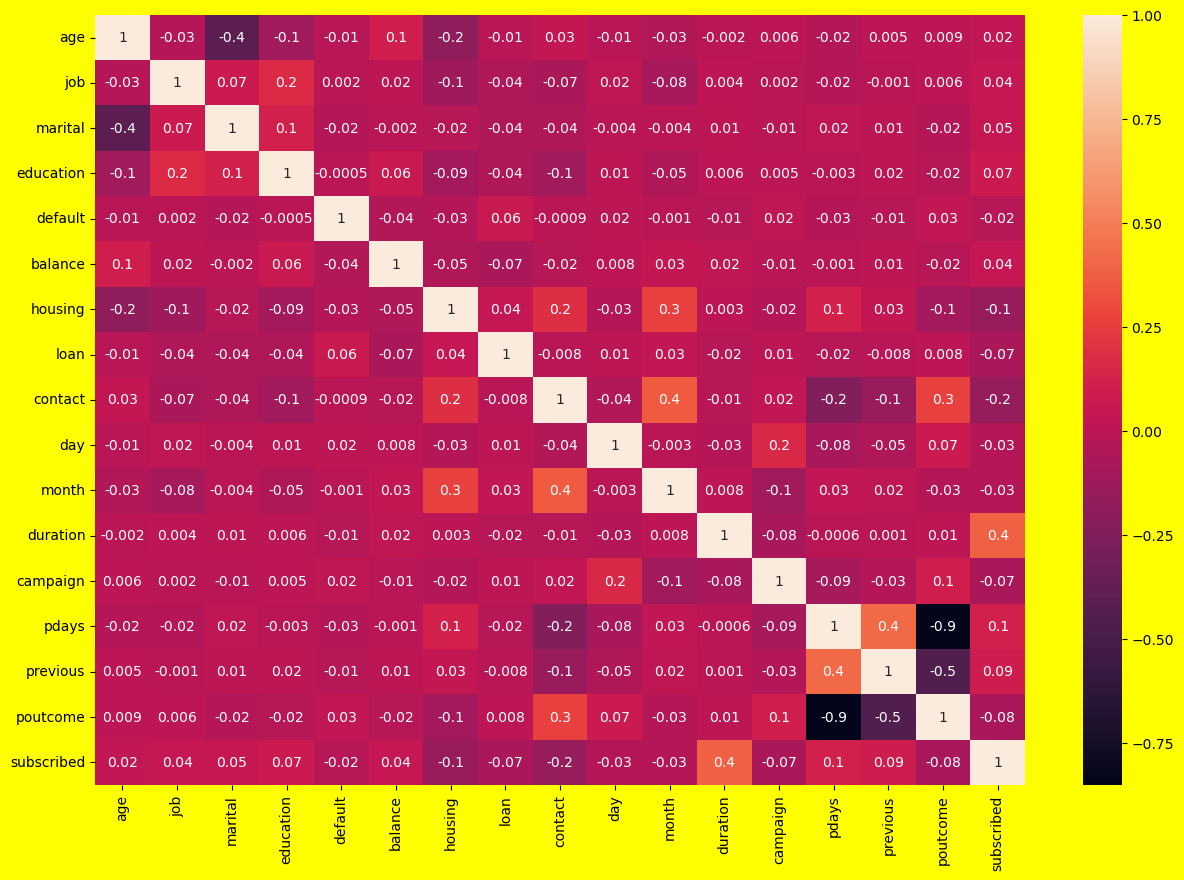

In [423]:
#checking corelation between features and target
plt.figure(figsize=(15,10),facecolor='yellow')
sns.heatmap(train_data.corr(),annot=True,fmt='.1g')
plt.show()

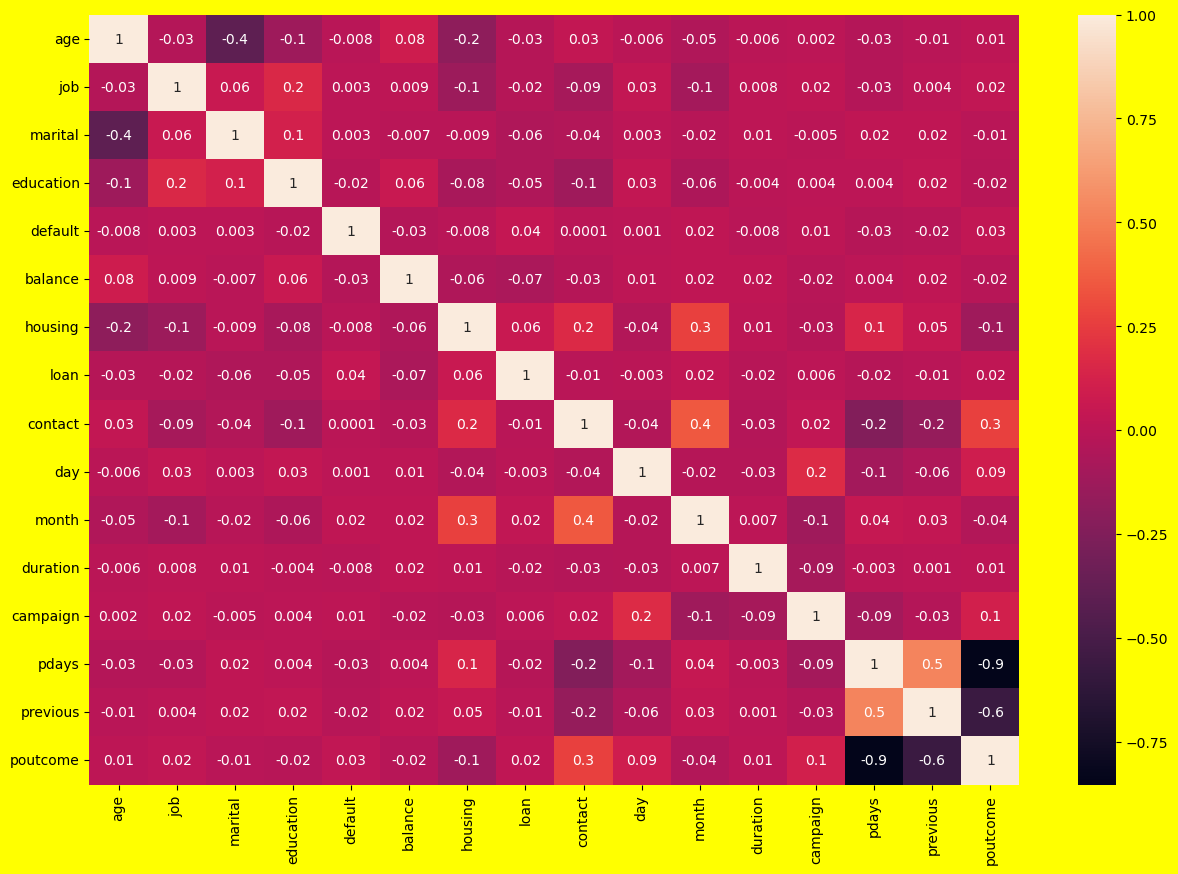

In [286]:
#checking corelation between features for test data
plt.figure(figsize=(15,10),facecolor='yellow')
sns.heatmap(test_data.corr(),annot=True,fmt='.1g')
plt.show()

In [424]:
train_data['balance']=np.log1p(train_data['balance'])

In [425]:
train_data['duration']=np.log1p(train_data['duration'])

In [426]:
test_data['balance']=np.log1p(test_data['balance'])

In [427]:
test_data['duration']=np.log1p(test_data['duration'])

In [428]:
train_data.skew()

age            0.689644
job            0.256181
marital       -0.099663
education      0.172248
default       10.294239
balance       -1.125567
housing       -0.162371
loan           1.988508
contact        0.797805
day            0.091757
month         -0.449657
duration      -0.420043
campaign       4.903960
pdays          2.654281
previous      49.958661
poutcome      -1.965815
subscribed     2.288875
dtype: float64

In [429]:
test_data.skew()

age           0.698243
job           0.250219
marital      -0.104527
education     0.167984
default      10.552570
balance      -1.096417
housing      -0.159905
loan          2.061437
contact       0.836668
day           0.111297
month        -0.425501
duration     -0.471799
campaign      4.993890
pdays         2.560549
previous      8.718081
poutcome     -1.892168
dtype: float64

In [430]:
x=train_data.drop('subscribed',axis=1)
y=train_data['subscribed']

In [431]:
# scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)


In [432]:
scaler1=StandardScaler()
test_data=pd.DataFrame(scaler1.fit_transform(test_data),columns=test_data.columns)

In [433]:
x.head()

age       job   marital  education   default   balance   housing  \
0  1.387756 -1.338475 -0.285345   2.340036 -0.096247  0.740100 -1.084471   
1 -0.937941  2.034678 -0.285345  -0.314909 -0.096247 -1.856976 -1.084471   
2 -1.310052  0.808077 -0.285345  -0.314909 -0.096247  0.414941  0.922109   
3  1.480784 -0.111874 -1.938272   1.012563 -0.096247  0.963078 -1.084471   
4 -0.937941  1.421378 -0.285345  -0.314909 -0.096247 -0.427904  0.922109   

       loan   contact       day     month  duration  campaign     pdays  \
0 -0.415918  0.416666  0.387397  1.153402 -1.496760 -0.243613 -0.412515   
1 -0.415918 -0.705374  0.507709 -0.161201 -0.715572 -0.243613 -0.412515   
2 -0.415918 -0.705374  0.267085 -0.161201  0.336398 -0.568711 -0.412515   
3 -0.415918 -0.705374  0.748333  0.167450  1.736166 -0.568711  0.436129   
4 -0.415918 -0.705374 -1.417283 -0.818502  0.836710 -0.568711 -0.412515   

   previous  poutcome  
0 -0.237706  0.447809  
1 -0.237706  0.447809  
2 -0.237706  0.447809  
3  0.971944 -0.564749  
4 -0.237706  0.447809

In [434]:
test_data.head()

age       job   marital  education   default   balance   housing  \
0 -0.843443  0.801406 -0.286829  -0.313243 -0.093939 -0.422132  0.923247   
1  3.450032  0.188823 -1.935431  -1.649537 -0.093939  0.903064 -1.083133   
2 -0.936780  0.495115  1.361774   1.023052 -0.093939 -0.339102  0.923247   
3  1.489967  0.801406  1.361774  -1.649537 -0.093939  1.030741  0.923247   
4 -0.843443 -0.117468  1.361774   1.023052 -0.093939 -2.430172  0.923247   

       loan   contact       day     month  duration  campaign     pdays  \
0 -0.405416 -0.692270 -0.081717  0.835272 -2.276980  1.075392 -0.422151   
1 -0.405416  0.436541 -1.776631 -0.147171  0.808866 -0.577680 -0.422151   
2 -0.405416  1.565352  0.039348  0.835272  1.448218 -0.577680 -0.422151   
3 -0.405416  0.436541 -0.323848  0.835272 -1.048744 -0.247065 -0.422151   
4 -0.405416 -0.692270  0.765739 -0.147171  1.024361 -0.247065 -0.422151   

   previous  poutcome  
0 -0.300093  0.458069  
1 -0.300093  0.458069  
2 -0.300093  0.458069  
3 -0.300093  0.458069  
4 -0.300093  0.458069

In [435]:
# check multicolinearity vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif_values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['features']=x.columns


In [436]:
# check multicolinearity vif for test data
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif1=pd.DataFrame()
vif1['vif_values']=[variance_inflation_factor(test_data.values,i)for i in range(len(test_data.columns))]
vif['features']=test_data.columns

In [437]:
vif

vif_values   features
0     1.283154        age
1     1.049294        job
2     1.228070    marital
3     1.065763  education
4     1.020649    default
5     1.034912    balance
6     1.185541    housing
7     1.015511       loan
8     1.313807    contact
9     1.037967        day
10    1.237090      month
11    1.047147   duration
12    1.091203   campaign
13    3.678831      pdays
14    1.271335   previous
15    3.874577   poutcome

In [438]:
vif1

vif_values
0     1.281193
1     1.050274
2     1.218485
3     1.065613
4     1.012234
5     1.029963
6     1.185573
7     1.018583
8     1.309581
9     1.044682
10    1.242528
11    1.054065
12    1.103069
13    3.766066
14    1.496768
15    4.051448

In [439]:
y.value_counts()

0    25402
1     3579
Name: subscribed, dtype: int64

In [440]:
# balance data using resample techniques
!pip install imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x1,y1=sm.fit_resample(x,y)

In [441]:
y1.value_counts()

0    25402
1    25402
Name: subscribed, dtype: int64

In [442]:
# model building
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
maxACC=0
maxRS=0
for i in range(1,200):
    x_train,x_val,y_train,y_val=train_test_split(x1,y1,test_size=0.3,random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_val)
    acc=accuracy_score(y_val,pred)
    if acc>maxACC:
        maxACC=acc
        maxRS=i
print('Accuracy score ', maxACC,'on random state ',maxRS)

Accuracy score  0.9477758824301272 on random state  191


In [443]:
x_train,x_val,y_train,y_val=train_test_split(x1,y1,test_size=0.3,random_state=maxRS)

In [445]:
# random forest classifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
RFC_pred=RFC.predict(x_val)
test_pred=RFC.predict(test_data)
print('Accuracy Score ',accuracy_score(y_val,RFC_pred))
print('\nConfusion matrix \n',confusion_matrix(y_val,RFC_pred))
print('\nclassification report\n ',classification_report(y_val,RFC_pred))

Accuracy Score  0.9473822333027162

Confusion matrix 
 [[7061  554]
 [ 248 7379]]

classification report
                precision    recall  f1-score   support

           0       0.97      0.93      0.95      7615
           1       0.93      0.97      0.95      7627

    accuracy                           0.95     15242
   macro avg       0.95      0.95      0.95     15242
weighted avg       0.95      0.95      0.95     15242



In [310]:
test_pred.shape

(12461,)

In [446]:
# logistic regression
LR=LogisticRegression()
LR.fit(x_train,y_train)
LR_pred=LR.predict(x_val)
test_pred1=LR.predict(test_data)
print('Accuracy Score ',accuracy_score(y_val,LR_pred))
print('\nConfusion matrix \n',confusion_matrix(y_val,LR_pred))
print('\nclassification report\n ',classification_report(y_val,LR_pred))

Accuracy Score  0.8122293662249048

Confusion matrix 
 [[6035 1580]
 [1282 6345]]

classification report
                precision    recall  f1-score   support

           0       0.82      0.79      0.81      7615
           1       0.80      0.83      0.82      7627

    accuracy                           0.81     15242
   macro avg       0.81      0.81      0.81     15242
weighted avg       0.81      0.81      0.81     15242



In [312]:
test_pred1

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [447]:
# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
DT_pred=DT.predict(x_val)
test_pred2=DT.predict(test_data)
print('Accuracy Score ',accuracy_score(y_val,DT_pred))
print('\nConfusion matrix \n',confusion_matrix(y_val,DT_pred))
print('\nclassification report\n ',classification_report(y_val,DT_pred))

Accuracy Score  0.9002755543891877

Confusion matrix 
 [[6817  798]
 [ 722 6905]]

classification report
                precision    recall  f1-score   support

           0       0.90      0.90      0.90      7615
           1       0.90      0.91      0.90      7627

    accuracy                           0.90     15242
   macro avg       0.90      0.90      0.90     15242
weighted avg       0.90      0.90      0.90     15242



In [315]:
test_pred2

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [448]:

# GradientBoosting classifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
GBC_pred=GBC.predict(x_val)
test_pred3=GBC.predict(test_data)
print('Accuracy Score ',accuracy_score(y_val,GBC_pred))
print('\nConfusion matrix \n',confusion_matrix(y_val,GBC_pred))
print('\nclassification report\n ',classification_report(y_val,GBC_pred))

Accuracy Score  0.9086734024406246

Confusion matrix 
 [[6777  838]
 [ 554 7073]]

classification report
                precision    recall  f1-score   support

           0       0.92      0.89      0.91      7615
           1       0.89      0.93      0.91      7627

    accuracy                           0.91     15242
   macro avg       0.91      0.91      0.91     15242
weighted avg       0.91      0.91      0.91     15242



In [449]:
#Adaboost clasifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
ABC_pred=ABC.predict(x_val)
test_pred4=ABC.predict(test_data)
print('Accuracy Score ',accuracy_score(y_val,ABC_pred))
print('\nConfusion matrix \n',confusion_matrix(y_val,ABC_pred))
print('\nclassification report\n ',classification_report(y_val,ABC_pred))

Accuracy Score  0.8790185015089883

Confusion matrix 
 [[6677  938]
 [ 906 6721]]

classification report
                precision    recall  f1-score   support

           0       0.88      0.88      0.88      7615
           1       0.88      0.88      0.88      7627

    accuracy                           0.88     15242
   macro avg       0.88      0.88      0.88     15242
weighted avg       0.88      0.88      0.88     15242



In [450]:
# bagging classifier
BAGG=BaggingClassifier()
BAGG.fit(x_train,y_train)
BAGG_pred=BAGG.predict(x_val)
test_pred5=BAGG.predict(test_data)
print('Accuracy Score ',accuracy_score(y_val,BAGG_pred))
print('\nConfusion matrix \n',confusion_matrix(y_val,BAGG_pred))
print('\nclassification report\n ',classification_report(y_val,BAGG_pred))

Accuracy Score  0.9273061278047501

Confusion matrix 
 [[7031  584]
 [ 524 7103]]

classification report
                precision    recall  f1-score   support

           0       0.93      0.92      0.93      7615
           1       0.92      0.93      0.93      7627

    accuracy                           0.93     15242
   macro avg       0.93      0.93      0.93     15242
weighted avg       0.93      0.93      0.93     15242



In [451]:
# extratrees clasifier
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
ETC_pred=ETC.predict(x_val)
test_pred6=ETC.predict(test_data)
print('Accuracy Score ',accuracy_score(y_val,ETC_pred))
print('\nConfusion matrix \n',confusion_matrix(y_val,ETC_pred))
print('\nclassification report\n ',classification_report(y_val,ETC_pred))

Accuracy Score  0.9574202860516993

Confusion matrix 
 [[7077  538]
 [ 111 7516]]

classification report
                precision    recall  f1-score   support

           0       0.98      0.93      0.96      7615
           1       0.93      0.99      0.96      7627

    accuracy                           0.96     15242
   macro avg       0.96      0.96      0.96     15242
weighted avg       0.96      0.96      0.96     15242



In [452]:
# SVC clasifier
from sklearn.svm import SVC
SVM=SVC()
SVM.fit(x_train,y_train)
SVM_pred=SVM.predict(x_val)
test_pred7=SVM.predict(test_data)
print('Accuracy Score ',accuracy_score(y_val,SVM_pred))
print('\nConfusion matrix \n',confusion_matrix(y_val,SVM_pred))
print('\nclassification report\n ',classification_report(y_val,SVM_pred))

Accuracy Score  0.8679307177535757

Confusion matrix 
 [[6210 1405]
 [ 608 7019]]

classification report
                precision    recall  f1-score   support

           0       0.91      0.82      0.86      7615
           1       0.83      0.92      0.87      7627

    accuracy                           0.87     15242
   macro avg       0.87      0.87      0.87     15242
weighted avg       0.87      0.87      0.87     15242



In [453]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(RFC,x1,y1,cv=5,scoring='accuracy')
print('Accuracy score ',accuracy_score(y_val,RFC_pred))
print(score)
print(score.mean())
print('Deference between accuracy score and cross val score ',accuracy_score(y_val,RFC_pred)-score.mean())

Accuracy score  0.9473822333027162
[0.88692058 0.95472887 0.95453203 0.95659876 0.95423228]
0.9414025043260204
Deference between accuracy score and cross val score  0.005979728976695853


In [454]:
score1=cross_val_score(LR,x1,y1,cv=5,scoring='accuracy')
print('Accuracy score ',accuracy_score(y_val,LR_pred))
print(score1)
print(score1.mean())
print('Deference between accuracy score and cross val score ',accuracy_score(y_val,LR_pred)-score1.mean())

Accuracy score  0.8122293662249048
[0.79637831 0.80641669 0.80740085 0.81842338 0.81230315]
0.8081844759994018
Deference between accuracy score and cross val score  0.004044890225503028


In [455]:
score2=cross_val_score(DT,x1,y1,cv=5,scoring='accuracy')
print('Accuracy score ',accuracy_score(y_val,DT_pred))
print(score2)
print(score2.mean())
print('Deference between accuracy score and cross val score ',accuracy_score(y_val,DT_pred)-score2.mean())

Accuracy score  0.9002755543891877
[0.81773447 0.91870879 0.91910245 0.91792146 0.92086614]
0.8988666640319206
Deference between accuracy score and cross val score  0.0014088903572671008


In [456]:
score3=cross_val_score(GBC,x1,y1,cv=5,scoring='accuracy')
print('Accuracy score ',accuracy_score(y_val,GBC_pred))
print(score3)
print(score3.mean())
print('Deference between accuracy score and cross val score ',accuracy_score(y_val,GBC_pred)-score3.mean())

Accuracy score  0.9086734024406246
[0.81428993 0.9238264  0.92116918 0.92412164 0.9226378 ]
0.9012089880483275
Deference between accuracy score and cross val score  0.0074644143922970585


In [457]:
score4=cross_val_score(ABC,x1,y1,cv=5,scoring='accuracy')
print('Accuracy score ',accuracy_score(y_val,ABC_pred))
print(score4)
print(score4.mean())
print('Deference between accuracy score and cross val score ',accuracy_score(y_val,ABC_pred)-score4.mean())

Accuracy score  0.8790185015089883
[0.80484204 0.89597481 0.88849523 0.8965653  0.88917323]
0.8750101205241284
Deference between accuracy score and cross val score  0.004008380984859894


In [458]:
score5=cross_val_score(BAGG,x1,y1,cv=5,scoring='accuracy')
print('Accuracy score ',accuracy_score(y_val,BAGG_pred))
print(score5)
print(score5.mean())
print('Deference between accuracy score and cross val score ',accuracy_score(y_val,BAGG_pred)-score5.mean())

Accuracy score  0.9273061278047501
[0.84243677 0.94262376 0.94419841 0.9473477  0.94370079]
0.9240614841213937
Deference between accuracy score and cross val score  0.0032446436833564185


In [460]:
score6=cross_val_score(ETC,x1,y1,cv=5,scoring='accuracy')
print('Accuracy score ',accuracy_score(y_val,ETC_pred))
print(score6)
print(score6.mean())
print('Deference between accuracy score and cross val score ',accuracy_score(y_val,ETC_pred)-score6.mean())

Accuracy score  0.9574202860516993
[0.95010334 0.96260211 0.9631926  0.96516091 0.96279528]
0.9607708452962423
Deference between accuracy score and cross val score  -0.003350559244543083


In [461]:
score7=cross_val_score(SVM,x1,y1,cv=5,scoring='accuracy')
print('Accuracy score ',accuracy_score(y_val,SVM_pred))
print(score7)
print(score7.mean())
print('Deference between accuracy score and cross val score ',accuracy_score(y_val,SVM_pred)-score7.mean())

Accuracy score  0.8679307177535757
[0.85670702 0.86822163 0.8693042  0.87166617 0.87047244]
0.8672742933262659
Deference between accuracy score and cross val score  0.0006564244273097319


In [ ]:
# FROM the deference of r2 score and cross validation score we can conclude the ExtraTreesRegressor is the best fitting and best performing ML model 

In [462]:
from sklearn.model_selection import GridSearchCV
grid_param={'n_estimators':[100,200,300],'max_depth':['None',10,15],'min_samples_leaf':[1,2,4],'min_samples_split':[2,5,10],'max_features':['auto','sqrt'],'bootstrap':[True,False]}


In [463]:
grid_cv=GridSearchCV(estimator=ExtraTreesClassifier(),param_grid=grid_param,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': ['None', 10, 15],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [465]:
best_parameters=grid_cv.best_params_
print(best_parameters)

{'bootstrap': False, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [477]:
etc=ExtraTreesClassifier(bootstrap=False,max_depth=None,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,n_estimators=300)

In [478]:
etc.fit(x_train,y_train)
pred=etc.predict(x_val)
test_pred=etc.predict(test_data)
print('acuracy score ',accuracy_score(y_val,pred))
print('\nconfusion matrix \n',confusion_matrix(y_val,pred))
print('\nclassification report\n ',classification_report(y_val,pred))

acuracy score  0.9572234614879938

confusion matrix 
 [[7068  547]
 [ 105 7522]]

classification report
                precision    recall  f1-score   support

           0       0.99      0.93      0.96      7615
           1       0.93      0.99      0.96      7627

    accuracy                           0.96     15242
   macro avg       0.96      0.96      0.96     15242
weighted avg       0.96      0.96      0.96     15242



In [479]:
test_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [ ]:
# before and after hyper parameter tuning getting almost same score 96 and 95.7